In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [10]:
from sklearn import preprocessing

In [11]:
from sklearn.cluster import KMeans

In [12]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [13]:
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [15]:
#read the data that contains alpha values of both methods prusner and KS
cluster_pd = pd.read_csv("C:/Users/Bayan Ali/Desktop/SpotTheBot/Clustering.csv")

In [16]:
#1
x_cluster = cluster_pd[["xmin based on data collapse","alpha based on data collapse","xmin based on KS","alpha based on KS"]]

In [82]:
list_of_columns = [["xmin based on data collapse","alpha based on data collapse","xmin based on KS","alpha based on KS"], ["alpha based on data collapse", "alpha based on KS"],[ "alpha based on KS"],["alpha based on data collapse"]]
list_of_save = ["4cols", "2cols", "KS","DC"]
list_of_title_kmeans = ["Алгоритм Kmeans для 4 объектов \n oценка силуэта =","Алгоритм Kmeans для 2 объектов \n oценка силуэта =","Алгоритм Kmeans для 1 объекта КС \n oценка силуэта =","Алгоритм Kmeans для 1 объекта ДС \n oценка силуэта ="]
list_of_title_wishart = ["Алгоритм Wishart для 4 объектов \n oценка силуэта =","Алгоритм Wishart для 2 объектов \n oценка силуэта =","Алгоритм Wishart для 1 объекта КС \n oценка силуэта =","Алгоритм Wishart для 1 объекта ДС \n oценка силуэта ="]
list_of_xlabel = ["хмин: Прусснер","альфа: Прусснер","альфа: КС","альфа: Прусснер"]
list_of_ylabel =["альфа: Прусснер","альфа: КС","альфа: КС","альфа: Прусснер"]

# K-means

In [83]:
kmeans_kwargs = {
"init": "k-means++",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

In [84]:
def Kmeans(data):
   # A list holds the SSE values for each k
    sse = []
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    kl = KneeLocator(range(2, 11), sse, curve="convex", direction="decreasing")
    return sse, kl.elbow

In [85]:
def calculate_silhouette(data):
    silhouette_coefficients = []
    # Notice you start at 2 clusters for silhouette coefficient
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_coefficients.append((score, k))
        silhouette_scores = [s for s,i in silhouette_coefficients]
    return silhouette_coefficients, silhouette_scores

In [86]:
def plot(silhouette_coefficients,silhouette_scores,sse, name_dir):
    fig, ax1 = plt.subplots(figsize=(6, 4))

    color = 'tab:red'
    ax1.set_xlabel("Количество кластеров")
    ax1.set_ylabel('SSE', color=color)
    ax1.plot(range(2, 11), sse, label = "SSE", color = "red", marker="*", linewidth = 1)
    ax1.tick_params(axis='y', labelcolor=color)
    plt.grid(linestyle='-')
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Коэффициент Cилуэта', color=color)  # we already handled the x-label with ax1
    ax2.plot(range(2,11), silhouette_scores, label = "Коэффициент Cилуэта", color = "blue", marker = "D", linewidth = 1)
    ax2.tick_params(axis='y', labelcolor=color)
    plt.axvline(max(silhouette_coefficients)[1], linestyle='--', color='black', dashes=(5, 5), linewidth=2)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.xticks(range(2,11))
    plt.savefig('C:/Users/Bayan Ali/Desktop/SpotTheBot/K_means/best_cluster'+name_dir+'.png')
    plt.savefig('C:/Users/Bayan Ali/Desktop/SpotTheBot/K_means/best_cluster'+name_dir+'.svg')
    plt.savefig('C:/Users/Bayan Ali/Desktop/SpotTheBot/K_means/best_cluster'+name_dir+'.eps')
    plt.show()

In [91]:
def Kmeans_Wishart_alg_plot(data,silhouette_coefficients,name_dir,xlabel,ylabel, title,predict, algo):
    label = predict
    if algo == "Kmeans":
        kmeans = KMeans(n_clusters=max(silhouette_coefficients)[1], **kmeans_kwargs)
        kmeans.fit(data)
        label = kmeans.fit_predict(data)
    plt.figure(figsize=(5,4))
    plt.rcParams["axes.edgecolor"] = "black"
    #Getting the Centroids    
    u_labels = np.unique(label)
    if name_dir =='DC' or name_dir == 'KS':
        if algo == "Kmeans":
            for i in u_labels:
                plt.scatter(data[label == i][0].values , data[label == i][0].values, label = i+1, s = 10, cmap = "RGB")
        else:
            for i in u_labels:
                plt.scatter(data[label == i][0].values , data[label == i][0].values, label = i, s = 10, cmap = "RGB") 
    else:
        print(name_dir)
        if algo == "Kmeans":
            for i in u_labels:
                plt.scatter(data[label == i][0].values , data[label == i][1].values, label = i+1, s = 10, cmap = "RGB")
        else:
            print(name_dir)
            for i in u_labels:
                plt.scatter(data[label == i][0].values , data[label == i][1].values, label = i, s = 10, cmap = "RGB")
 
    plt.legend(frameon=True)
    plt.grid(linestyle='--')


    #plt.title(title+ str(np.round(max(silhouette_coefficients)[0],4)), fontsize=10)
    plt.xlabel(xlabel, fontsize=9)
    plt.ylabel(ylabel, fontsize=9)
    if algo == "Kmeans":
        plt.title(title+ str(np.round(max(silhouette_coefficients)[0],4)), fontsize=10)
        plt.savefig('C:/Users/Bayan Ali/Desktop/SpotTheBot/K_means/clusters'+ name_dir +'.svg')
        plt.savefig('C:/Users/Bayan Ali/Desktop/SpotTheBot/K_means/clusters'+ name_dir +'.png')
        plt.savefig('C:/Users/Bayan Ali/Desktop/SpotTheBot/K_means/clusters'+ name_dir +'.eps')
    else:
        plt.title(title+ str(np.round(silhouette_coefficients,4)), fontsize=10)
        plt.savefig('C:/Users/Bayan Ali/Desktop/SpotTheBot/Wishart/clusters'+ name_dir +'.svg')
        plt.savefig('C:/Users/Bayan Ali/Desktop/SpotTheBot/Wishart/clusters'+ name_dir +'.png')
        plt.savefig('C:/Users/Bayan Ali/Desktop/SpotTheBot/Wishart/clusters'+ name_dir +'.eps')
    plt.show()


4cols хмин: Прусснер альфа: Прусснер Алгоритм Kmeans для 4 объектов 
 oценка силуэта =
['xmin based on data collapse', 'alpha based on data collapse', 'xmin based on KS', 'alpha based on KS']
5
9 9 9


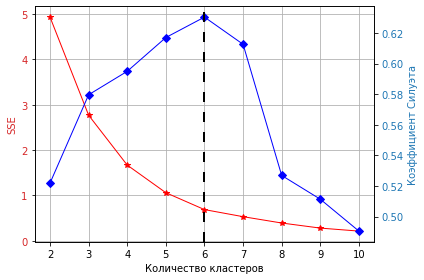

4cols


C:\Users\BAYANA~1\AppData\Local\Temp/ipykernel_14580/3528182983.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[label == i][0].values , data[label == i][1].values, label = i+1, s = 10, cmap = "RGB")
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


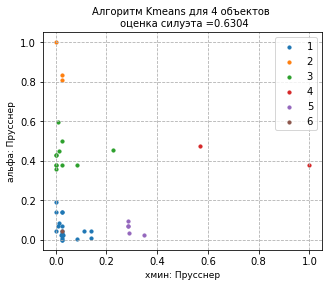

2cols альфа: Прусснер альфа: КС Алгоритм Kmeans для 2 объектов 
 oценка силуэта =
['alpha based on data collapse', 'alpha based on KS']
4
9 9 9


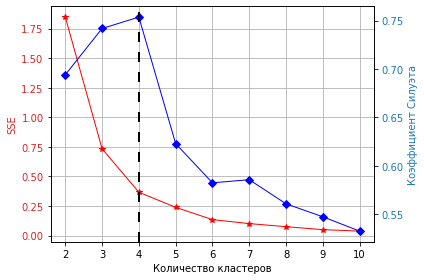

2cols


C:\Users\BAYANA~1\AppData\Local\Temp/ipykernel_14580/3528182983.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[label == i][0].values , data[label == i][1].values, label = i+1, s = 10, cmap = "RGB")
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


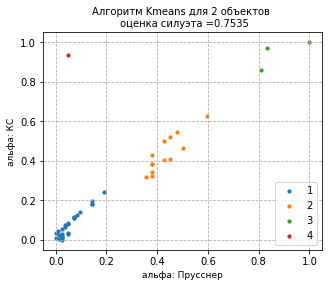

KS альфа: КС альфа: КС Алгоритм Kmeans для 1 объекта КС 
 oценка силуэта =
['alpha based on KS']
3
9 9 9


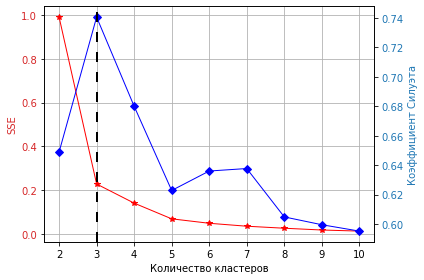

C:\Users\BAYANA~1\AppData\Local\Temp/ipykernel_14580/3528182983.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[label == i][0].values , data[label == i][0].values, label = i+1, s = 10, cmap = "RGB")
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


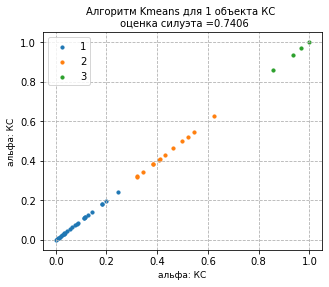

DC альфа: Прусснер альфа: Прусснер Алгоритм Kmeans для 1 объекта ДС 
 oценка силуэта =
['alpha based on data collapse']
3
9 9 9


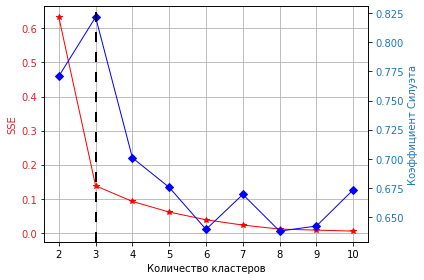

C:\Users\BAYANA~1\AppData\Local\Temp/ipykernel_14580/3528182983.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[label == i][0].values , data[label == i][0].values, label = i+1, s = 10, cmap = "RGB")
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


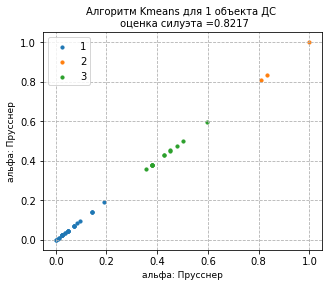

In [92]:
for item, name_dir, xlabel, ylabel, title in zip(list_of_columns, list_of_save, list_of_xlabel, list_of_ylabel, list_of_title_kmeans):
    print(name_dir, xlabel, ylabel, title )
    x_cluster = cluster_pd[item]
    scaler = preprocessing.MinMaxScaler()
    x_scaled_cluster_data = scaler.fit_transform(x_cluster)
    X_train_cluster = pd.DataFrame(x_scaled_cluster_data)
    sse, best_num_clusters = Kmeans(X_train_cluster)
    print(item)
    print(best_num_clusters)
    silhouette_coefficients, silhouette_scores = calculate_silhouette(X_train_cluster)
    print(len(sse), len(silhouette_scores), len(silhouette_coefficients))
    plot(silhouette_coefficients, silhouette_scores,sse,name_dir)
    Kmeans_Wishart_alg_plot(X_train_cluster,silhouette_coefficients, name_dir, xlabel,ylabel,title,0, "Kmeans")


# Wishart

In [1]:
%run Wishart.py

c:\Users\Bayan Ali\anaconda3\envs\new_env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Bayan Ali\anaconda3\envs\new_env\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Bayan Ali\anaconda3\envs\new_env\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [42]:
import numpy as np
from Wishart import PreTrainWishart
from tqdm import notebook
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [74]:
def wishart_fun(data, neighbours):
    score = []
    for sig in enumerate(np.logspace(10, 30, 30)):
        wishart = Wishart(significance_level = sig,\
                            wishart_neighbors = neighbours)
        predict= wishart.fit(x_scaled_cluster_data)

        max_cluster = np.max(predict)
        min_cluster = np.min(predict)

        clusters = [[] for i in range(max_cluster - min_cluster + 1)]
        for index, cluster in enumerate(predict):
            clusters[cluster - min_cluster].append(index)

        means = np.empty((len(clusters), x_scaled_cluster_data.shape[1]))
        for index, cluster_elems in enumerate(clusters):
            means[index] = np.mean(x_scaled_cluster_data[cluster_elems], axis = 0)

        if len(clusters) == 1:
            continue
        score = silhouette_score(x_scaled_cluster_data, predict)

    return len(clusters), score, predict

4cols хмин: Прусснер альфа: Прусснер Алгоритм Wishart для 4 объектов 
 oценка силуэта =
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering


Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
['xmin based on data collapse', 'alpha based on data collapse', 'xmin based on KS', 'alpha based on KS'] 1
9
4cols
4cols


C:\Users\BAYANA~1\AppData\Local\Temp/ipykernel_14580/3528182983.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[label == i][0].values , data[label == i][1].values, label = i, s = 10, cmap = "RGB")
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


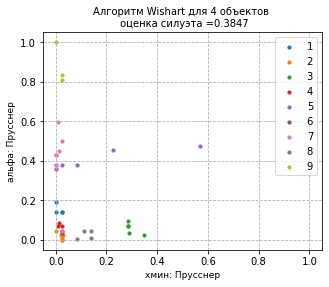

2cols альфа: Прусснер альфа: КС Алгоритм Wishart для 2 объектов 
 oценка силуэта =
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
['alpha based on data collapse', 'alpha based on KS'] 2
5
2cols
2cols


C:\Users\BAYANA~1\AppData\Local\Temp/ipykernel_14580/3528182983.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[label == i][0].values , data[label == i][1].values, label = i, s = 10, cmap = "RGB")
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


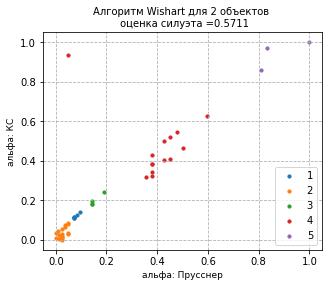

KS альфа: КС альфа: КС Алгоритм Wishart для 1 объекта КС 
 oценка силуэта =
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
['alpha based on KS'] 2
6


C:\Users\BAYANA~1\AppData\Local\Temp/ipykernel_14580/3528182983.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[label == i][0].values , data[label == i][0].values, label = i, s = 10, cmap = "RGB")
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


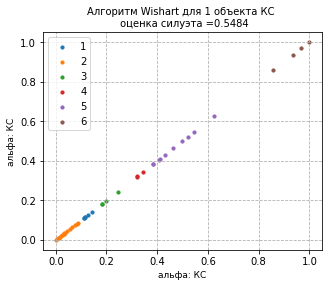

DC альфа: Прусснер альфа: Прусснер Алгоритм Wishart для 1 объекта ДС 
 oценка силуэта =
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering


c:\Users\Bayan Ali\Desktop\SpotTheBot\Wishart.py:57: RuntimeWarning: divide by zero encountered in power
  significan = np.power(my_clusters[:, 0], -dim) - np.power(my_clusters[:, 1], -dim)
c:\Users\Bayan Ali\Desktop\SpotTheBot\Wishart.py:57: RuntimeWarning: invalid value encountered in subtract
  significan = np.power(my_clusters[:, 0], -dim) - np.power(my_clusters[:, 1], -dim)
c:\Users\Bayan Ali\Desktop\SpotTheBot\Wishart.py:57: RuntimeWarning: divide by zero encountered in power
  significan = np.power(my_clusters[:, 0], -dim) - np.power(my_clusters[:, 1], -dim)
c:\Users\Bayan Ali\Desktop\SpotTheBot\Wishart.py:57: RuntimeWarning: invalid value encountered in subtract
  significan = np.power(my_clusters[:, 0], -dim) - np.power(my_clusters[:, 1], -dim)
c:\Users\Bayan Ali\Desktop\SpotTheBot\Wishart.py:57: RuntimeWarning: divide by zero encountered in power
  significan = np.power(my_clusters[:, 0], -dim) - np.power(my_clusters[:, 1], -dim)
c:\Users\Bayan Ali\Desktop\SpotTheBot\Wishart.

Start clustering
Start clustering
Start clustering
Start clustering
['alpha based on data collapse'] 4
4


c:\Users\Bayan Ali\Desktop\SpotTheBot\Wishart.py:57: RuntimeWarning: divide by zero encountered in power
  significan = np.power(my_clusters[:, 0], -dim) - np.power(my_clusters[:, 1], -dim)
c:\Users\Bayan Ali\Desktop\SpotTheBot\Wishart.py:57: RuntimeWarning: invalid value encountered in subtract
  significan = np.power(my_clusters[:, 0], -dim) - np.power(my_clusters[:, 1], -dim)
C:\Users\BAYANA~1\AppData\Local\Temp/ipykernel_14580/3528182983.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[label == i][0].values , data[label == i][0].values, label = i, s = 10, cmap = "RGB")
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


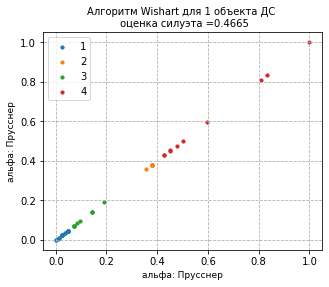

In [93]:
for item, name_dir, xlabel, ylabel, title in zip(list_of_columns, list_of_save, list_of_xlabel, list_of_ylabel, list_of_title_wishart):
    print(name_dir, xlabel, ylabel, title )
    x_cluster = cluster_pd[item]
    scaler = preprocessing.MinMaxScaler()
    x_scaled_cluster_data = scaler.fit_transform(x_cluster)
    X_train_cluster = pd.DataFrame(x_scaled_cluster_data)
    if name_dir =="4cols":
        neigh = 1
    elif name_dir == "2cols":
        neigh = 2
    elif name_dir == "DC":
        neigh = 4
    else:
        neigh = 2

    best_num_clusters, score, predict = wishart_fun(X_train_cluster, neigh)
    print(item, neigh)
    print(best_num_clusters)
    Kmeans_Wishart_alg_plot(X_train_cluster,score, name_dir, xlabel,ylabel,title,predict, "Wishart")

    
   